<a href="https://colab.research.google.com/github/JesperHLund/ML_mini_project/blob/main/CIFAR10_small_images_classification_dataset_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN image classification using CIFAR10 small images classification dataset
We will train and evaluate a CNN on CIFAR10 small images classification dataset. It consists of 50,000 colour images of 32x32 pixels each, and 10,000 test images, labeled over 10 categories

## Setup

In [1]:
# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot figures
%matplotlib inline
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Load the data
Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set.

In [2]:
cifar10_Images = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10_Images.load_data()
assert X_train_full.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train_full.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [3]:
# Show the size and dimension of the dataset.
X_train_full.shape

(50000, 32, 32, 3)

In [4]:
# Each pixel intensity is represented as a byte (0 to 255).
X_train_full.dtype

dtype('uint8')

In [5]:
# Split the full training set into a validation set and a (smaller) training set,
# and scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [6]:
X_train.shape

(45000, 32, 32, 3)

In [7]:
X_valid.shape

(5000, 32, 32, 3)

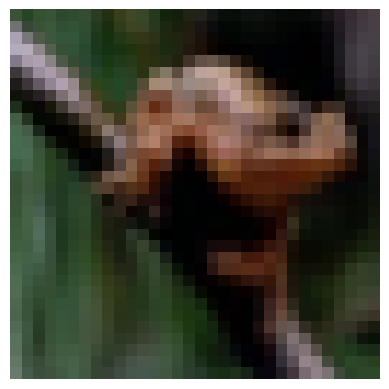

In [19]:
#Plot an image using Matplotlib's imshow() function, with a binary color map:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [9]:
# The labels are the class IDs (represented as uint8), from 0 to 9.
y_train

array([[6],
       [7],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
# Load class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [18]:
class_names[y_train[0][0]]

'frog'

In [20]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Create a model using the Sequential API

In [21]:
model = models.Sequential()

# Convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 output classes

## Compile the model

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##Training the model